In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
pip install seaborn


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U kaleido


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('api.csv',encoding='utf-8')

In [3]:
allowed_labels=['major','minor','patch']
labels = df[df['label'].isin(allowed_labels)]


In [4]:
labels.fillna(0, inplace=True)

In [5]:
import pandas as pd
df=pd.read_csv('mongoo.csv',encoding='utf-8')

In [6]:
final= pd.read_csv('final_api.csv',encoding='utf-8')

In [7]:
final['api_spec_id'].isin(df['api_spec_id']).value_counts()

api_spec_id
True    74584
Name: count, dtype: int64

merged= pd.concat([final,df],axis=1, join='inner')

In [8]:
merged=pd.read_csv('merged.csv',encoding='utf-8')

In [9]:
merged['commit_date'] = pd.to_datetime(merged['commit_date']).dt.date

In [10]:
merged['Year']= pd.to_datetime(merged['commit_date']).dt.year

In [11]:
data=df.query('api_spec_id==779')
data.to_csv('d.csv',index=False)

In [12]:
df['diff2'] = df['diff2'].replace({np.nan: '{}'})

In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import re

keywords_regex = {
    'errors': r'(\w+ errors)',
    'count': r'\((\d+)\)',
    'content': r'\[(.*?)\]'
}

# Define a function to extract keywords from a string
def extract_keywords(text):
    keywords = {}
    for name, regex in keywords_regex.items():
        keywords[name] = re.findall(regex, text)
    return pd.Series(keywords)

# Apply the function to the 'diff_2' column and add the extracted keywords as new columns
df[list(keywords_regex.keys())] = df['diff2'].apply(extract_keywords)


In [14]:
# Make new column type of change, if errors= compatability errors, then type of change= breaking change
merged['type_of_change'] = np.where(merged['errors'].isnull(), 'Non-Breaking', 'Breaking')


In [15]:
merged['type_of_change'].groupby(merged['errors']).value_counts()

errors                type_of_change
compatibility errors  Breaking          11689
Name: count, dtype: int64

In [16]:
merged['type_of_change'].value_counts()

type_of_change
Non-Breaking    62895
Breaking        11689
Name: count, dtype: int64

In [17]:
api=pd.read_csv('api.csv',encoding='utf-8')

In [18]:
api.drop(['commit_date','info_version','id','label'],axis=1,inplace=True)

In [19]:
merged['api_spec_id'].isin(api['api_spec_id']).value_counts()

api_spec_id
True    74584
Name: count, dtype: int64

In [20]:
final_api= pd.concat([merged,api],axis=1, join='inner')

In [21]:
final_api.to_csv('final.csv',index=False)

In [22]:
new_api=pd.read_csv('final.csv',encoding='utf-8')

age= pd.read_csv('mongo_docs.csv',encoding='utf-8')

In [23]:
new_api['api_spec_id'].isin(age['id']).value_counts()

NameError: name 'age' is not defined

In [24]:
new=pd.read_csv('final_new.csv',encoding='utf-8')

new['label'] = new['label'].replace({np.nan: 'Empty'})

In [25]:
new.replace (0, np.nan, inplace=True)

In [27]:
labels['type_of_change'].groupby(labels['label']).value_counts()

label  type_of_change
major  Non-Breaking       173
       Breaking            49
minor  Non-Breaking       847
       Breaking           167
patch  Non-Breaking      2916
       Breaking           622
Name: count, dtype: int64

In [28]:
non_breaking_changes=new[new['type_of_change']=='Non-Breaking']

# no of rows where label is major and contains at least one non-breaking change
num_major_non_breaking = len(non_breaking_changes[non_breaking_changes['label']=='major'])

# no of rows where label is minor and contains at least one non-breaking change
num_minor_non_breaking = len(non_breaking_changes[non_breaking_changes['label']=='minor'])

# no of rows where label is patch and contains at least one non-breaking change
num_patch_non_breaking = len(non_breaking_changes[non_breaking_changes['label']=='patch'])

total_non_breaking = len(non_breaking_changes)

percentage_non_breaking= (total_non_breaking/len(new))*100



In [29]:
# calculate the number of rows where type_of_change is "breaking"
breaking_changes = new[new["type_of_change"] == "Breaking"]

# calculate the number of rows where label is "Major" and contains at least one breaking change
num_major_breaking = len(breaking_changes[breaking_changes["label"] == "major"])
print(num_major_breaking)

# calculate the number of rows where label is "Minor" and contains at least one breaking change
num_minor_breaking = len(breaking_changes[breaking_changes["label"] == "minor"])
print(num_minor_breaking)

# calculate the number of rows where label is "Patch" and contains at least one breaking change
num_patch_breaking = len(breaking_changes[breaking_changes["label"] == "patch"])
print(num_patch_breaking)

# calculate the total number of rows that contain at least one breaking change
total_breaking = len(breaking_changes)
print(total_breaking)

# calculate the total number of rows
total_changes = len(new)
print(total_changes)

# calculate the percentage of rows that contain at least one breaking change
percentage_breaking = (total_breaking / total_changes) * 100
print(percentage_breaking)

# calculate the percentage of rows where label is "Major" and contains at least one breaking change
percentage_major_breaking = (num_major_breaking / total_breaking) * 100
print(percentage_major_breaking)

# calculate the percentage of rows where label is "Minor" and contains at least one breaking change
percentage_minor_breaking = (num_minor_breaking / total_breaking) * 100
print(percentage_minor_breaking)

# calculate the percentage of rows where label is "Patch" and contains at least one breaking change
percentage_patch_breaking = (num_patch_breaking / total_breaking) * 100
print(percentage_patch_breaking)

# calculate the percentage of rows where label is "Major" and does not contain any breaking changes
percentage_major_nonbreaking = 100 - percentage_major_breaking
print(percentage_major_nonbreaking)

# calculate the percentage of rows where label is "Minor" and does not contain any breaking changes
percentage_minor_nonbreaking = 100 - percentage_minor_breaking
print(percentage_minor_nonbreaking)

# calculate the percentage of rows where label is "Patch" and does not contain any breaking changes
percentage_patch_nonbreaking = 100 - percentage_patch_breaking
print(percentage_patch_nonbreaking)



49
167
622
11689
74584
15.672262147377452
0.41919753614509364
1.4286936435965438
5.321242193515271
99.58080246385491
98.57130635640345
94.67875780648473


In [31]:
pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
from tabulate import tabulate

table = [["Total Number of Changes", total_changes],
        [ "Total Breaking", total_breaking, f"{percentage_breaking:.2f}%"],
        [ "Total Non-Breaking", total_non_breaking, f"{percentage_non_breaking:.2f}%"],
         ["Major Breaking Changes", num_major_breaking, f"{percentage_major_breaking:.2f}%"],
         ["Minor Breaking Changes", num_minor_breaking, f"{percentage_minor_breaking:.2f}%"],
         ["Patch Breaking Changes", num_patch_breaking, f"{percentage_patch_breaking:.2f}%"],
         ["Major Non-Breaking Changes",num_major_non_breaking, f"{percentage_major_nonbreaking:.2f}%"],
         ["Minor Non-Breaking Changes",num_minor_non_breaking, f"{percentage_minor_nonbreaking:.2f}%"],
         ["Patch Non-Breaking Changes",num_patch_non_breaking, f"{percentage_patch_nonbreaking:.2f}%"]]

headers = ["Type of Change", "Count", "Percentage"]

print(tabulate(table, headers=headers))


Type of Change                Count  Percentage
--------------------------  -------  ------------
Total Number of Changes       74584
Total Breaking                11689  15.67%
Total Non-Breaking            62895  84.33%
Major Breaking Changes           49  0.42%
Minor Breaking Changes          167  1.43%
Patch Breaking Changes          622  5.32%
Major Non-Breaking Changes      173  99.58%
Minor Non-Breaking Changes      847  98.57%
Patch Non-Breaking Changes     2916  94.68%


In [33]:
new['label'] = new['label'].replace({'0': 'no change'})

In [34]:
allowed_labels=['major','minor','patch']
labels = new[new['label'].isin(allowed_labels)]


In [35]:
new['type_of_change'].value_counts()

type_of_change
Non-Breaking    62895
Breaking        11689
Name: count, dtype: int64

In [36]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Convert the 'Date' column to a datetime format
labels['commit_date'] = pd.to_datetime(labels['commit_date'])

# Group the data by year and label type and count the number of releases
df_grouped = labels.groupby([labels['commit_date'].dt.year, 'label'])['label'].count().reset_index(name='count')


# Pivot the data to have label types as columns and years as rows
df_pivot = df_grouped.pivot(index='commit_date', columns='label', values='count')

# Fill any missing values with 0
df_pivot.fillna(0, inplace=True)



In [37]:
df_pivot = df_pivot.drop(2015)
df_pivot = df_pivot.drop(2023)

In [38]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Convert the 'Date' column to a datetime format
labels['commit_date'] = pd.to_datetime(labels['commit_date'])

# Group the data by year and label type and count the number of releases
df_grouped = labels.groupby([labels['commit_date'].dt.year, 'type_of_change'])['type_of_change'].count().reset_index(name='count')


# Pivot the data to have label types as columns and years as rows
breaking_pivot = df_grouped.pivot(index='commit_date', columns='type_of_change', values='count')

# Fill any missing values with 0
breaking_pivot.fillna(0, inplace=True)


In [39]:
breaking_pivot = breaking_pivot.drop(2015)
breaking_pivot = breaking_pivot.drop(2023)

In [40]:
breaking_pivot

type_of_change,Breaking,Non-Breaking
commit_date,,
2016,11.0,57.0
2017,40.0,165.0
2018,82.0,401.0
2019,277.0,1071.0
2020,168.0,715.0
2021,138.0,723.0
2022,118.0,803.0


In [41]:
df_pivot

label,major,minor,patch
commit_date,,,
2016,9.0,17.0,42.0
2017,8.0,11.0,186.0
2018,17.0,37.0,429.0
2019,107.0,115.0,1126.0
2020,37.0,244.0,602.0
2021,29.0,350.0,482.0
2022,15.0,235.0,671.0


In [42]:
labels['label'].groupby(labels['type_of_change']).value_counts()

type_of_change  label
Breaking        patch     622
                minor     167
                major      49
Non-Breaking    patch    2916
                minor     847
                major     173
Name: count, dtype: int64

In [43]:
grouped_final = labels.loc[(labels['type_of_change'] == 'Breaking') & (labels['label'] != 'major')].groupby([labels['commit_date'].dt.year, 'type_of_change', 'label'])['label'].count().reset_index(name='count')
grouped_final.drop([0, 15], inplace=True)
#grouped_final

In [44]:
grouped_sum = grouped_final.groupby(['commit_date', 'type_of_change'])['count'].sum().reset_index()
grouped_sum

,commit_date,type_of_change,count
0,2016,Breaking,10
1,2017,Breaking,39
2,2018,Breaking,78
3,2019,Breaking,249
4,2020,Breaking,160
5,2021,Breaking,133
6,2022,Breaking,116


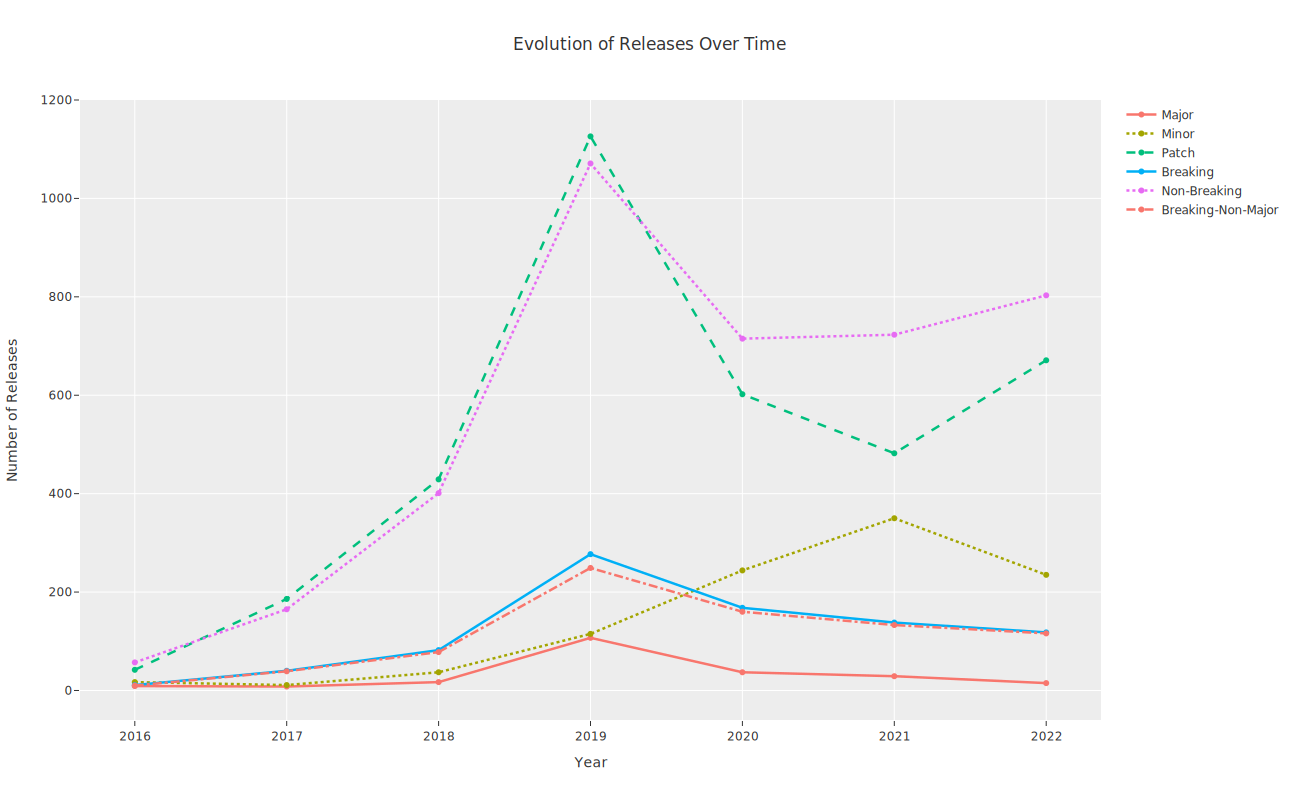

In [45]:
# Create a line chart to plot the number of releases over time
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_pivot.index, y=df_pivot['major'], name='Major', line=dict(dash='solid'),line_width=2.5))
fig.add_trace(go.Scatter(x=df_pivot.index, y=df_pivot['minor'], name='Minor', line=dict(dash='dot'), line_width=2.5))
fig.add_trace(go.Scatter(x=df_pivot.index, y=df_pivot['patch'], name='Patch', line=dict(dash='dash'), line_width=2.5))
fig.add_trace(go.Scatter(x=breaking_pivot.index, y=breaking_pivot['Breaking'], name='Breaking', line=dict(dash='solid'),line_width=2.5))
fig.add_trace(go.Scatter(x=breaking_pivot.index, y=breaking_pivot['Non-Breaking'], name='Non-Breaking', line=dict(dash='dot'), line_width=2.5))
fig.add_trace(go.Scatter(x=grouped_sum['commit_date'], y=grouped_sum['count'], name='Breaking-Non-Major', line=dict(dash='dashdot'), line_width=2.5))


fig.update_layout(title='Evolution of Releases Over Time', width=1300, height=800, template='ggplot2', yaxis_range=[-60, 1200], xaxis_title='Year', yaxis_title='Number of Releases')
fig.show("svg")


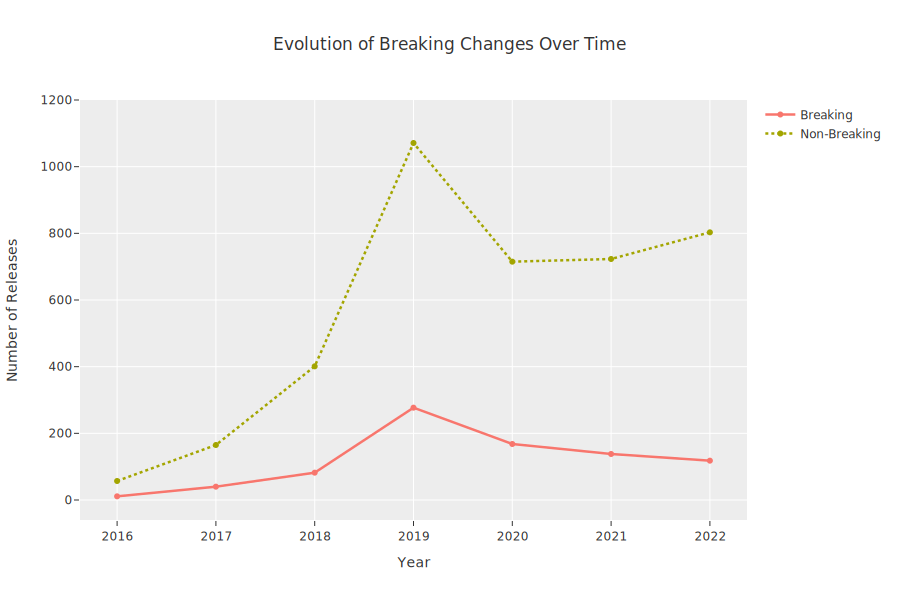

In [46]:
fig= go.Figure()
fig.add_trace(go.Scatter(x=breaking_pivot.index, y=breaking_pivot['Breaking'], name='Breaking', line=dict(dash='solid'),line_width=2.5))
fig.add_trace(go.Scatter(x=breaking_pivot.index, y=breaking_pivot['Non-Breaking'], name='Non-Breaking', line=dict(dash='dot'), line_width=2.5))

fig.update_layout(title='Evolution of Breaking Changes Over Time', width=900, height=600, template='ggplot2', yaxis_range=[-60, 1200], xaxis_title='Year', yaxis_title='Number of Releases')
fig.show("svg")

In [47]:
new['label'].groupby(new['count']).value_counts().to_csv('count.csv')

## Median Age

In [48]:
median_api_age = new['api_age'].median(skipna=True)


In [49]:
median_api_age

430.5

In [50]:
new['api_age'].value_counts()

api_age
595.0     35
237.0     20
39.0      17
5.0       14
1.0       14
          ..
791.0      1
1076.0     1
590.0      1
1371.0     1
508.0      1
Name: count, Length: 1041, dtype: int64

In [51]:
new['commits'].describe()

count    74584.000000
mean        11.566100
std         38.331583
min          2.000000
25%          2.000000
50%          4.000000
75%         10.000000
max       3585.000000
Name: commits, dtype: float64

In [52]:
new['info_versions_changes'].describe()

count    7802.000000
mean        4.071648
std        14.439052
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       496.000000
Name: info_versions_changes, dtype: float64

In [53]:
new.fillna(0, inplace=True)

## Segmentation of API

In [54]:
import numpy as np

conditions = [
    (new['commits'].between(0, 80) & new['info_versions_changes'].between(0, 50) & (new['api_age'].between(0, 182))), # 182 days = 6 months
    (new['commits'].between(0, 100) & new['info_versions_changes'].between(0, 200) & new['api_age'].between(182, 548)), # 182 days = 6 months and 548 days = 1.5 years
    ((new['api_age'].between(548, 1825))),
    (new['api_age'] > 1825)  ]



choices = ['Early', 'Developing', 'Mature','Legacy']

new['api_group'] = np.select(conditions, choices, default='Other')


In [55]:
new['api_group'].value_counts()

api_group
Early         71693
Other          1244
Mature          912
Developing      684
Legacy           51
Name: count, dtype: int64

In [56]:
check = new[new['api_group'] == 'Other']
check['commits'].describe()

count    1244.000000
mean      185.487138
std       183.164827
min        52.000000
25%        98.000000
50%       130.000000
75%       194.000000
max      3109.000000
Name: commits, dtype: float64

In [57]:
check['info_versions_changes'].describe()

count    1244.000000
mean        7.458199
std        32.492747
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       496.000000
Name: info_versions_changes, dtype: float64

In [58]:
check['api_age'].value_counts()

api_age
0.0      1222
435.0       3
438.0       1
3.0         1
453.0       1
430.0       1
57.0        1
4.0         1
518.0       1
93.0        1
448.0       1
140.0       1
41.0        1
175.0       1
475.0       1
302.0       1
545.0       1
314.0       1
501.0       1
541.0       1
424.0       1
Name: count, dtype: int64

In [59]:
pd.crosstab(new['type_of_change'], new['api_group'])

api_group,Developing,Early,Legacy,Mature,Other
type_of_change,,,,,
Breaking,67,11356,6,100,160
Non-Breaking,617,60337,45,812,1084


In [60]:
new.drop(['id'], axis=1, inplace=True)

In [61]:
allowed_groups = ["Other"]
sub = new[new["api_group"].isin(allowed_groups)]

In [64]:
new['commit_date'] = pd.to_datetime(new['commit_date'])
new = new[new['commit_date'].dt.year != 2023]

In [65]:
new = new[new['commit_date'].dt.year != 2014]

## Breaking and Non Breaking Changes over the years for different API Groups

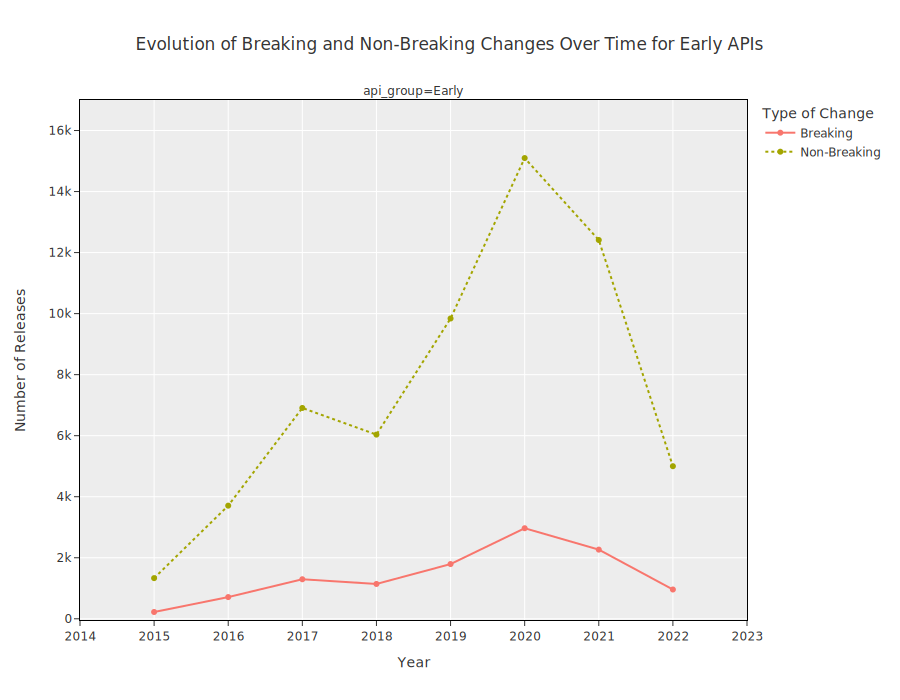

In [66]:
import pandas as pd
import plotly.express as px

new['commit_date'] = pd.to_datetime(new['commit_date'])

df_grouped = new.groupby([new['api_group'], new['commit_date'].dt.year, 'type_of_change'])['type_of_change'].count().reset_index(name='count')

# Filter the dataframe to only include "Mature" and "Other" api_group values
df_grouped = df_grouped[df_grouped['api_group'].isin(['Early'])]

fig = px.line(df_grouped, x='commit_date', y='count', color='type_of_change', facet_col='api_group',
              line_dash='type_of_change', labels={'commit_date': 'Year', 'count': 'Number of Releases'},
              title='Evolution of Breaking and Non-Breaking Changes Over Time for Early APIs', template='ggplot2')

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(width=900, height=700, xaxis_range=[2014, 2023], yaxis_range=[-40, 17000], legend_title_text='Type of Change')
fig.update_traces(mode='lines+markers')

fig.show("svg")


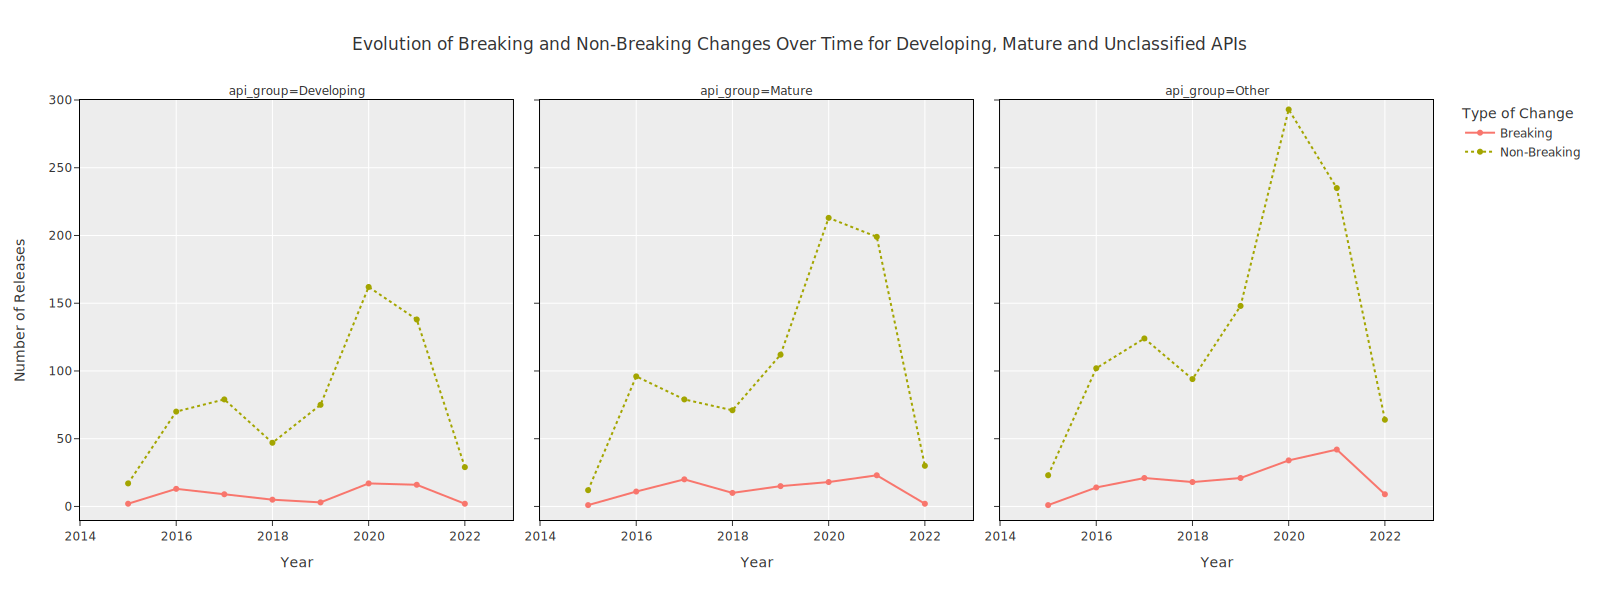

In [67]:
import pandas as pd
import plotly.express as px

new['commit_date'] = pd.to_datetime(new['commit_date'])

df_grouped = new.groupby([new['api_group'], new['commit_date'].dt.year, 'type_of_change'])['type_of_change'].count().reset_index(name='count')

# Filter the dataframe to only include "Mature" and "Other" api_group values
df_grouped = df_grouped[df_grouped['api_group'].isin(['Mature', 'Developing','Other'])]

fig = px.line(df_grouped, x='commit_date', y='count', color='type_of_change', facet_col='api_group',
              line_dash='type_of_change', labels={'commit_date': 'Year', 'count': 'Number of Releases'},
              title='Evolution of Breaking and Non-Breaking Changes Over Time for Developing, Mature and Unclassified APIs', template='ggplot2')

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(width=1600, height=600, xaxis_range=[2014, 2023], yaxis_range=[-10, 300], legend_title_text='Type of Change')
fig.update_traces(mode='lines+markers')

fig.show("svg")


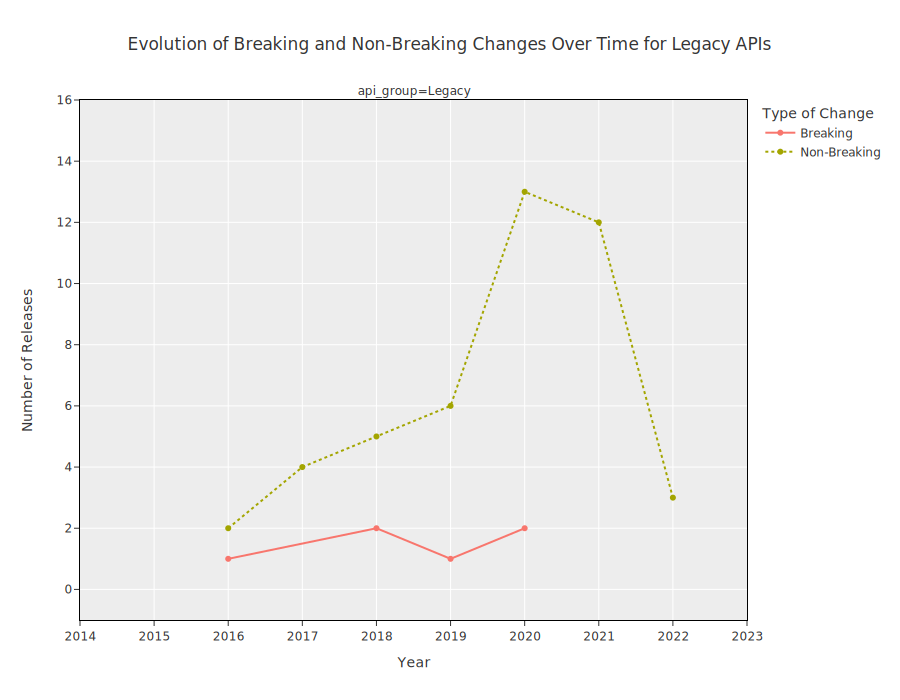

In [68]:
import pandas as pd
import plotly.express as px

new['commit_date'] = pd.to_datetime(new['commit_date'])

df_grouped = new.groupby([new['api_group'], new['commit_date'].dt.year, 'type_of_change'])['type_of_change'].count().reset_index(name='count')

# Filter the dataframe to only include "Mature" and "Other" api_group values
df_grouped = df_grouped[df_grouped['api_group'].isin(['Legacy'])]

fig = px.line(df_grouped, x='commit_date', y='count', color='type_of_change', facet_col='api_group',
              line_dash='type_of_change', labels={'commit_date': 'Year', 'count': 'Number of Releases'},
              title='Evolution of Breaking and Non-Breaking Changes Over Time for Legacy APIs', template='ggplot2')

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(width=900, height=700, xaxis_range=[2014, 2023], yaxis_range=[-1, 16], legend_title_text='Type of Change')
fig.update_traces(mode='lines+markers')

fig.show("svg")


In [69]:
df_grouped = new.groupby([new['api_group'], new['commit_date'].dt.year, 'type_of_change'])['type_of_change'].count().reset_index(name='count')

In [70]:
df_grouped

,api_group,commit_date,type_of_change,count
0,Developing,2015,Breaking,2
1,Developing,2015,Non-Breaking,17
2,Developing,2016,Breaking,13
3,Developing,2016,Non-Breaking,70
4,Developing,2017,Breaking,9
...,...,...,...,...
70,Other,2020,Non-Breaking,293
71,Other,2021,Breaking,42
72,Other,2021,Non-Breaking,235
73,Other,2022,Breaking,9


In [71]:
df_new = df_grouped.sort_values(
    ["api_group",
     "type_of_change",
     "commit_date"])\
    .reset_index(drop=True)

In [72]:
df_new

,api_group,commit_date,type_of_change,count
0,Developing,2015,Breaking,2
1,Developing,2016,Breaking,13
2,Developing,2017,Breaking,9
3,Developing,2018,Breaking,5
4,Developing,2019,Breaking,3
...,...,...,...,...
70,Other,2018,Non-Breaking,94
71,Other,2019,Non-Breaking,148
72,Other,2020,Non-Breaking,293
73,Other,2021,Non-Breaking,235


In [73]:
df_grouped_nb = df_grouped[df_grouped['type_of_change'] == 'Non-Breaking']
df_grouped_b = df_grouped[df_grouped['type_of_change'] == 'Breaking']

new['commit_date'] = pd.to_datetime(new['commit_date'])

df_grouped = new.groupby([new['api_group'], new['commit_date'].dt.year, 'type_of_change'])['type_of_change'].count().reset_index(name='count')
for api_group in df_grouped['api_group'].unique():
    breaking_pivot = df_grouped[df_grouped['api_group'] == api_group].pivot_table(index='commit_date', columns='type_of_change', values='count', fill_value=0)
    print(breaking_pivot)

In [74]:
new['commit_date'] = pd.to_datetime(new['commit_date'])

df_grouped = new.groupby([new['api_group'], new['commit_date'].dt.year, 'type_of_change'])['type_of_change'].count().reset_index(name='count')

# Create an empty dictionary to store the pivot tables for each group
pivot_tables = {}

# Iterate over the unique api groups in the DataFrame
for api_group in df_grouped['api_group'].unique():
    
    # Filter the DataFrame for the current api_group
    group_data = df_grouped[df_grouped['api_group'] == api_group]
    
    # Generate the pivot table for the current group
    breaking_pivot = group_data.pivot_table(index='commit_date', columns='type_of_change', values='count', fill_value=0)
    
    # Store the pivot table in the dictionary with the api_group name as the key
    pivot_tables[api_group] = breaking_pivot

for api_group, pivot_table in pivot_tables.items():
    print(api_group)
    print(pivot_table)


Developing
type_of_change  Breaking  Non-Breaking
commit_date                           
2015                   2            17
2016                  13            70
2017                   9            79
2018                   5            47
2019                   3            75
2020                  17           162
2021                  16           138
2022                   2            29
Early
type_of_change  Breaking  Non-Breaking
commit_date                           
2015                 222          1332
2016                 711          3707
2017                1295          6908
2018                1141          6035
2019                1793          9840
2020                2967         15097
2021                2266         12412
2022                 959          5000
Legacy
type_of_change  Breaking  Non-Breaking
commit_date                           
2016                   1             2
2017                   0             4
2018                   2             5
2

In [75]:
top_content = new["content"].value_counts().nlargest(17).reset_index()
top_content_dropped = top_content.drop([0, 7])
df5 = pd. DataFrame(top_content_dropped)

In [78]:
df5

,content,count
1,api-path-removed-without-deprecation,4236
2,request-parameter-removed,2024
3,request-property-removed,622
4,api-removed-without-deprecation,524
5,new-required-request-parameter,502
6,new-required-request-property,420
8,response-success-status-removed,367
9,request-parameter-became-required,351
10,response-body-type-changed,229
11,response-property-type-changed,224


## Different Types of Breaking Changes

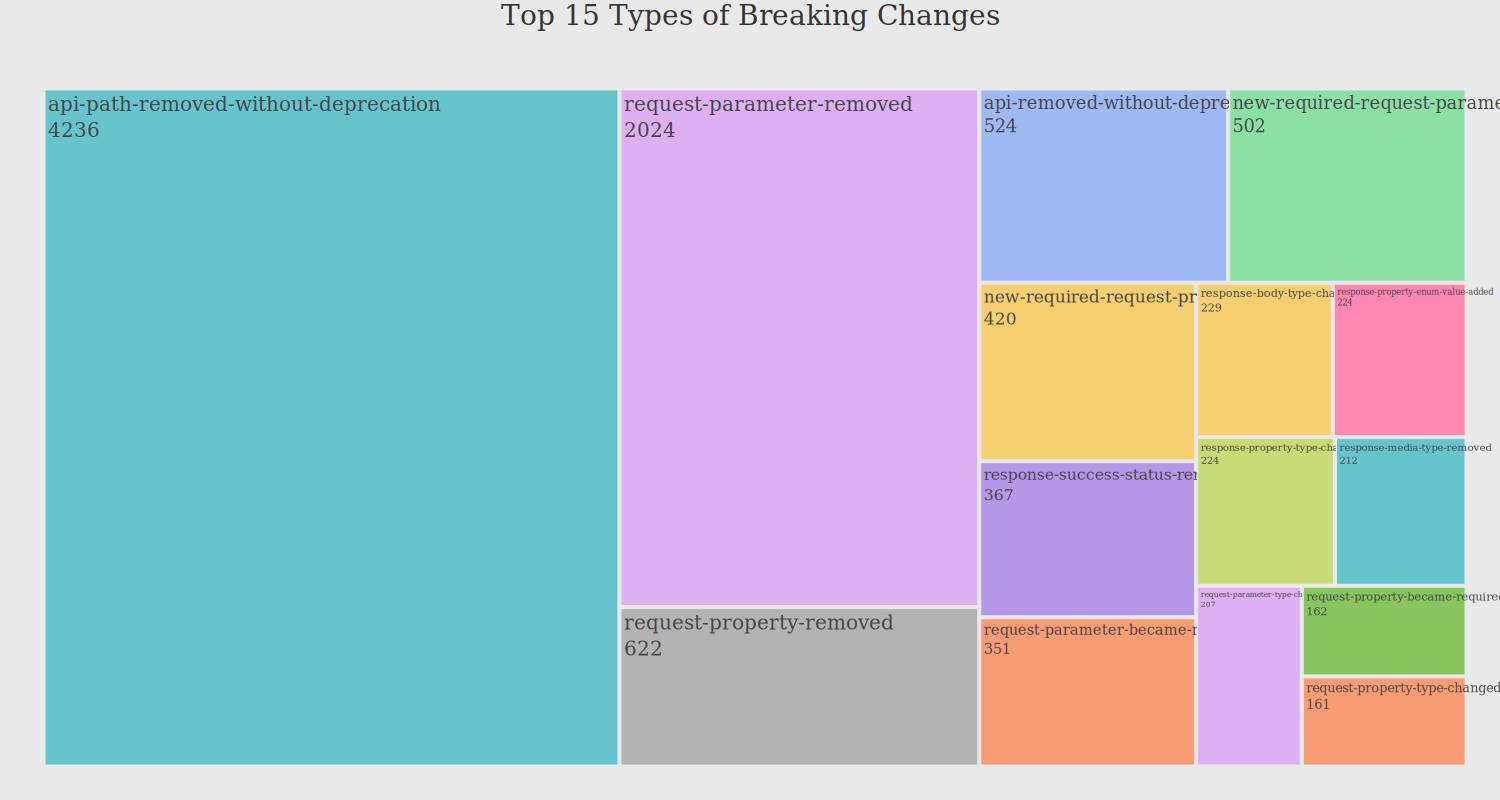

In [79]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np


fig = px.treemap(df5, path=['content'],values='count', color='content', color_discrete_sequence=px.colors.qualitative.Pastel, width = 1500,
    height = 800, title='Top 15 Types of Breaking Changes')

fig.update_traces(textinfo='label+value')
fig.update_layout(margin = dict(t=50, l=35, r=25, b=25), template='ggplot2',font=dict(size=20, family='Serif'), paper_bgcolor='rgba(233,233,233,100)')
fig.show("svg")


In [80]:
mongo=pd.read_csv('trial.csv', encoding='utf-8')

In [81]:
mongo.drop(['Unnamed: 0', 'api_version','extracted_versions','commit_date','diff','diff_2'], axis=1, inplace=True)

In [82]:
new['api_spec_id'].isin(mongo['api_spec_id']).value_counts()

api_spec_id
True    74575
Name: count, dtype: int64

In [83]:
final_new= pd.concat([new, mongo], join='inner', axis=1)

In [87]:
features_in_breaking_changes = new[new['type_of_change'] == 'Breaking']['components'].value_counts().nlargest(50).reset_index()
features_in_breaking_changes.drop([7], inplace=True)
features_in_breaking_changes

,components,count
0,"paths-modified,endpoints-modified",3639
1,"paths-added,paths-deleted,endpoints-added,endp...",1581
2,"paths-modified,paths-added,paths-deleted,endpo...",739
3,"paths-deleted,endpoints-deleted",373
4,"paths-modified,paths-added,endpoints-added,end...",362
5,"paths-modified,endpoints-modified,components-s...",283
6,"paths-modified,paths-deleted,endpoints-deleted...",256
8,"info-version,paths-modified,endpoints-modified",159
9,"paths-modified,endpoints-added,endpoints-deleted",151
10,"paths-modified,paths-added,endpoints-added,end...",132


media = new[new['content'] == 'response-media-type-removed']['components'].value_counts().nlargest(15).reset_index()
media.drop([9], inplace=True)
media=pd.DataFrame(media)

In [86]:
df_counts = pd.DataFrame(features_in_breaking_changes)

In [ ]:
df_counts['Percent'] = round(df_counts['Count'] / df_counts['Count'].sum() * 100, 2)


In [ ]:
pd.crosstab(labels['type_of_change'], labels['label'])

label,major,minor,patch
type_of_change,,,
Breaking,49,167,622
Non-Breaking,173,847,2916


In [ ]:
important_content = ['api-path-removed-without-deprecation', 'request-parameter-removed', 'request-property-removed', 
                     'api-removed-without-deprecation', 'new-required-request-parameter', 'new-required-request-property', 
                     'response-success-status-removed', 'request-parameter-became-required', 'response-body-type-changed', 
                     'response-property-type-changed', 'response-property-enum-value-added', 'response-media-type-removed', 
                     'request-parameter-type-changed','request-property-became-required','request-property-type-changed']

breaking_changes = new[new['type_of_change'] == 'Breaking'][new['content'].isin(important_content)]

# Group the data by 'api_group' and 'content', and count the occurrences of each 'content' type in each group
grouped_changes = breaking_changes.groupby(['api_group', 'content'])['content'].count().unstack(fill_value=0)


In [ ]:
grouped_changes = pd. DataFrame(grouped_changes)

In [ ]:
grouped_changes.sort_values(by=['api-path-removed-without-deprecation'], ascending=False, inplace=True)
grouped_changes

content,api-path-removed-without-deprecation,api-removed-without-deprecation,new-required-request-parameter,new-required-request-property,request-parameter-became-required,request-parameter-removed,request-parameter-type-changed,request-property-became-required,request-property-removed,request-property-type-changed,response-body-type-changed,response-media-type-removed,response-property-enum-value-added,response-property-type-changed,response-success-status-removed
api_group,,,,,,,,,,,,,,,
Early,4113,503,491,410,346,1973,201,156,603,157,221,201,216,220,357
Other,63,5,6,2,3,25,2,2,11,2,3,4,3,3,4
Mature,31,7,3,5,1,17,1,3,4,1,4,6,4,0,3
Developing,24,8,2,3,1,9,3,1,4,1,1,1,1,1,3
Legacy,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import plotly.express as px

# Filter for Early group
early_changes = grouped_changes.loc['Early']

early_changes = pd.DataFrame(early_changes)


In [ ]:
early_changes = early_changes.reset_index()

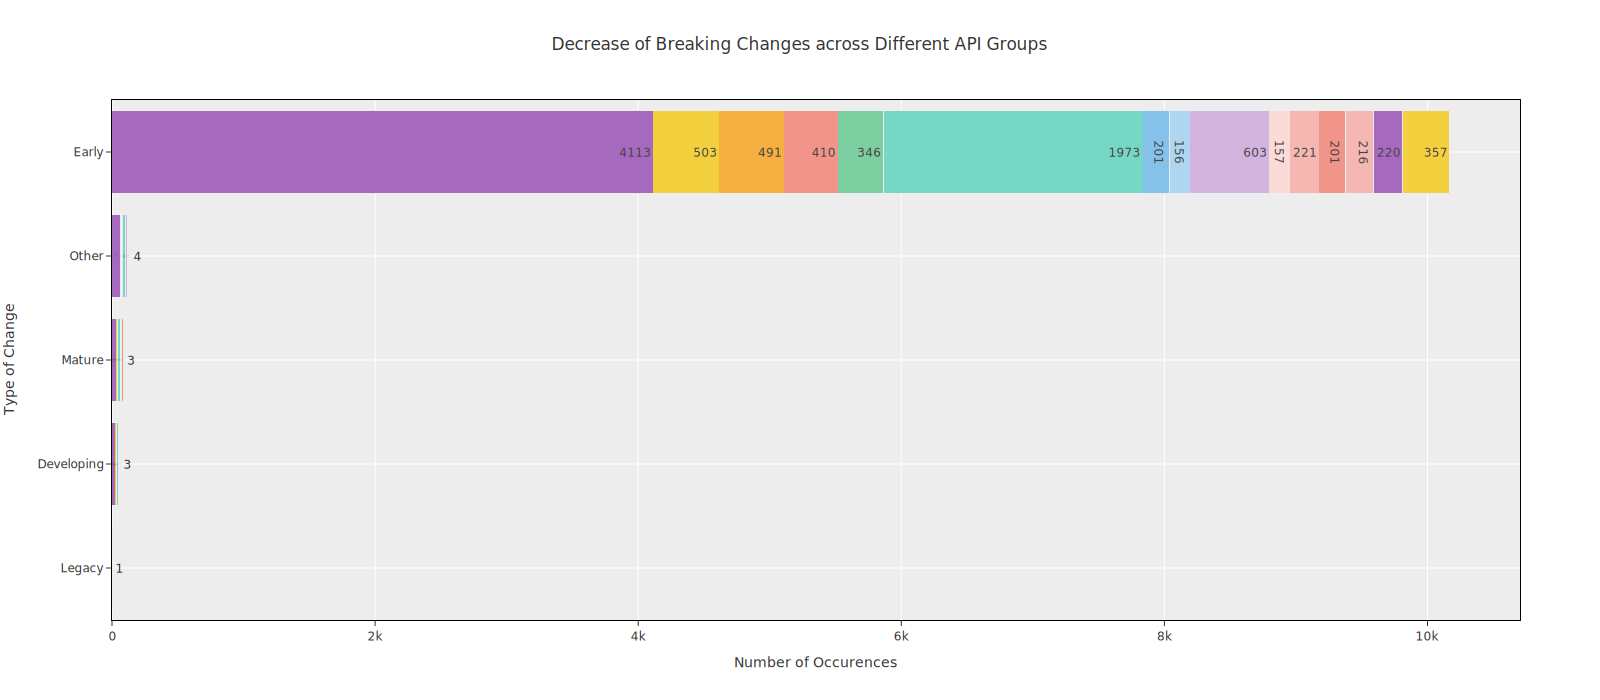

In [ ]:
# create stacked bar chart wwith df grouped_changes
import plotly.express as px

fig = px.bar(grouped_changes, x= grouped_changes.columns, y=grouped_changes.index, barmode='stack', color_discrete_sequence=['#A569BD', '#F4D03F', '#F5B041', '#F1948A', '#7DCEA0', '#76D7C4', '#85C1E9', '#AED6F1', '#D2B4DE', '#FADBD8', '#F5B7B1', '#F1948A', '#F5B7B1'], title='Decrease of Breaking Changes across Different API Groups', text_auto=True)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(categoryorder='total ascending',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(template='ggplot2',width=1600, height=700, xaxis_title='Number of Occurences', yaxis_title='Type of Change', showlegend=False)

fig.show("svg")


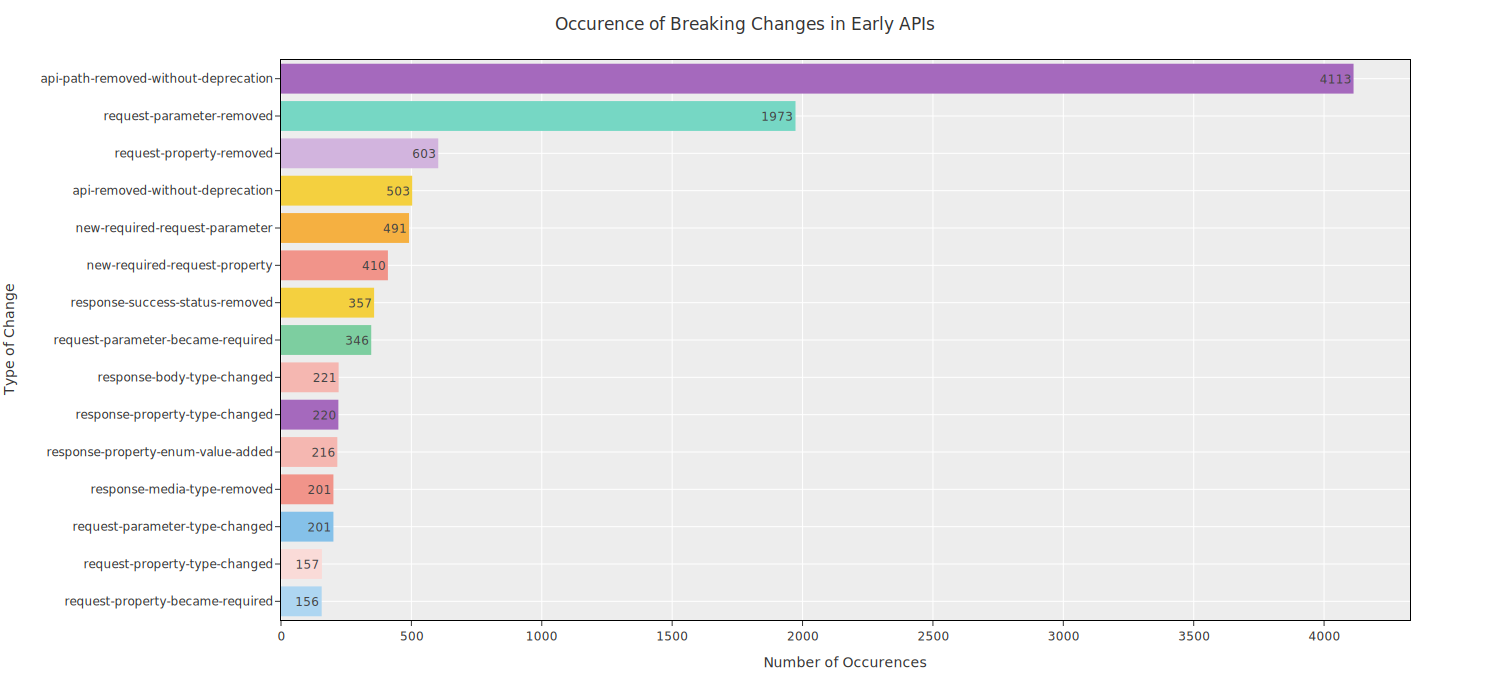

In [ ]:
fig= px.histogram(early_changes, x="Early", y="content",color="content", color_discrete_sequence=['#A569BD', '#F4D03F', '#F5B041', '#F1948A', '#7DCEA0', '#76D7C4', '#85C1E9', '#AED6F1', '#D2B4DE', '#FADBD8', '#F5B7B1', '#F1948A', '#F5B7B1'], text_auto=True)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(categoryorder='total ascending',showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_layout(template='ggplot2',width=1490, height=700, title = 'Occurence of Breaking Changes in Early APIs', xaxis_title='Number of Occurences', yaxis_title='Type of Change', showlegend=False)

fig.show("svg")


In [ ]:
import plotly.express as px
developing_changes = grouped_changes.loc['Developing']
mature_changes = grouped_changes.loc['Mature']
legacy_changes = grouped_changes.loc['Legacy']

developing_changes = pd.DataFrame(developing_changes)
mature_changes = pd.DataFrame(mature_changes)
legacy_changes = pd.DataFrame(legacy_changes)

In [ ]:
other_changes = pd.DataFrame(grouped_changes.loc['Other'])
other_changes = other_changes.reset_index()

In [ ]:
developing_changes = developing_changes.reset_index()
mature_changes = mature_changes.reset_index()
legacy_changes = legacy_changes.reset_index()

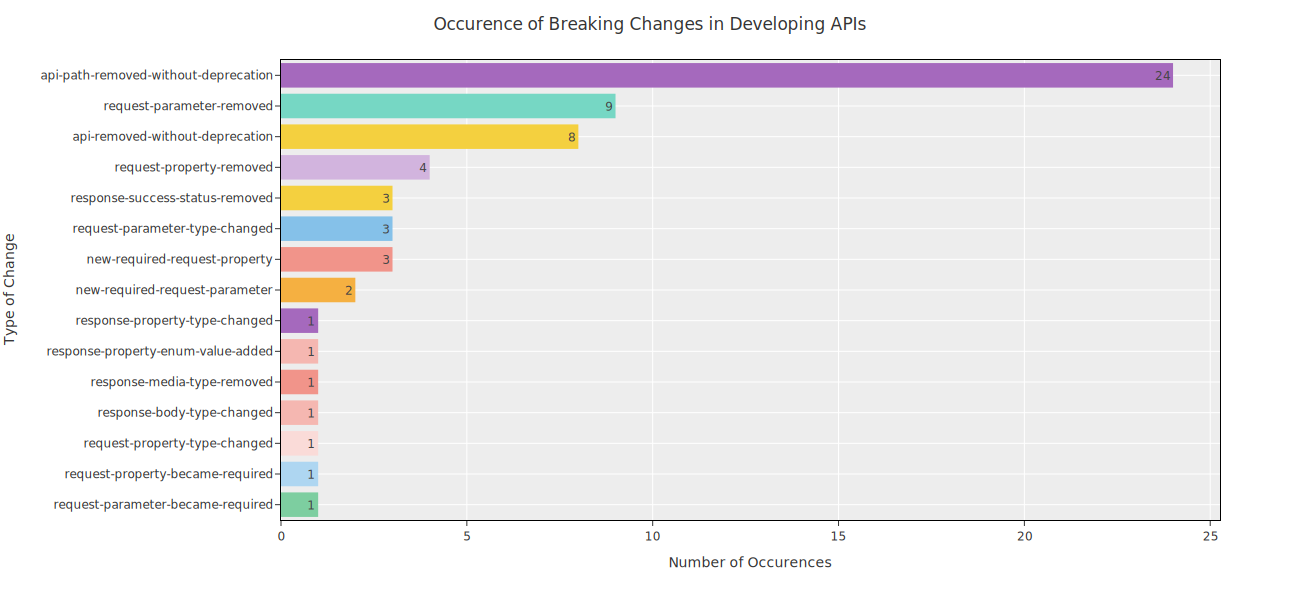

In [ ]:
fig= px.histogram(developing_changes, x="Developing", y="content",color="content", color_discrete_sequence=['#A569BD', '#F4D03F', '#F5B041', '#F1948A', '#7DCEA0', '#76D7C4', '#85C1E9', '#AED6F1', '#D2B4DE', '#FADBD8', '#F5B7B1', '#F1948A', '#F5B7B1'], text_auto=True)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(categoryorder='total ascending',showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_layout(template='ggplot2',width=1300, height=600, title = 'Occurence of Breaking Changes in Developing APIs', xaxis_title='Number of Occurences', yaxis_title='Type of Change', showlegend=False)

fig.show("svg")


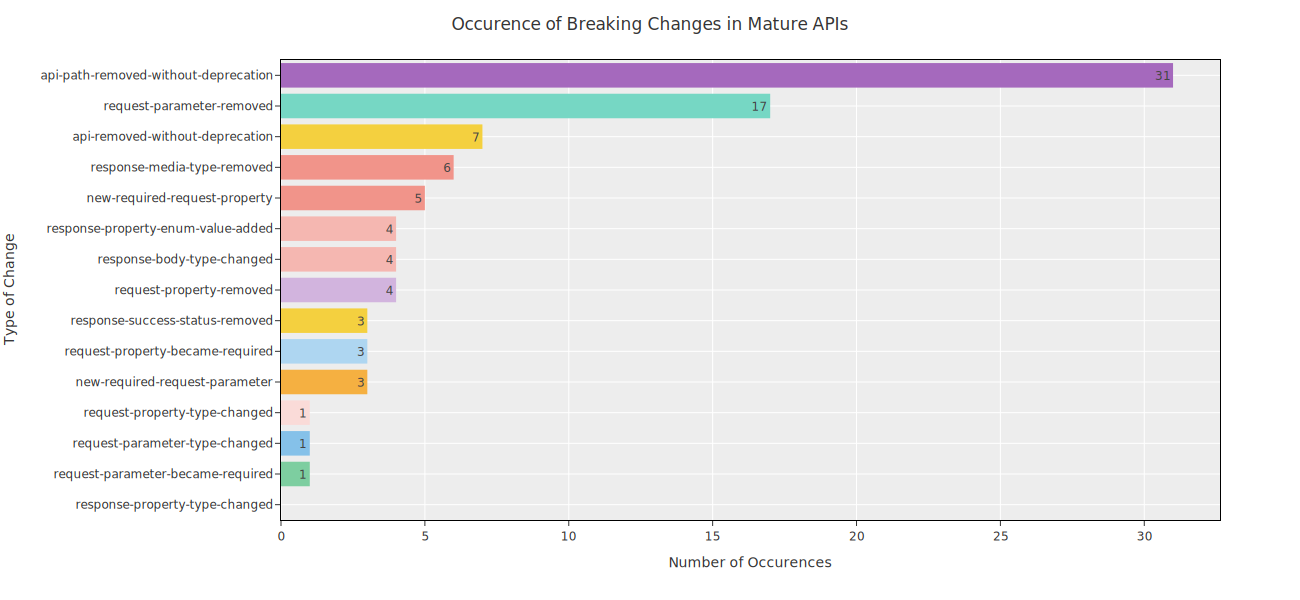

In [ ]:
fig= px.histogram(mature_changes, x="Mature", y="content",color="content", color_discrete_sequence=['#A569BD', '#F4D03F', '#F5B041', '#F1948A', '#7DCEA0', '#76D7C4', '#85C1E9', '#AED6F1', '#D2B4DE', '#FADBD8', '#F5B7B1', '#F1948A', '#F5B7B1'], text_auto=True)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(categoryorder='total ascending',showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_layout(template='ggplot2',width=1300, height=600, title = 'Occurence of Breaking Changes in Mature APIs', xaxis_title='Number of Occurences', yaxis_title='Type of Change', showlegend=False)

fig.show("svg")


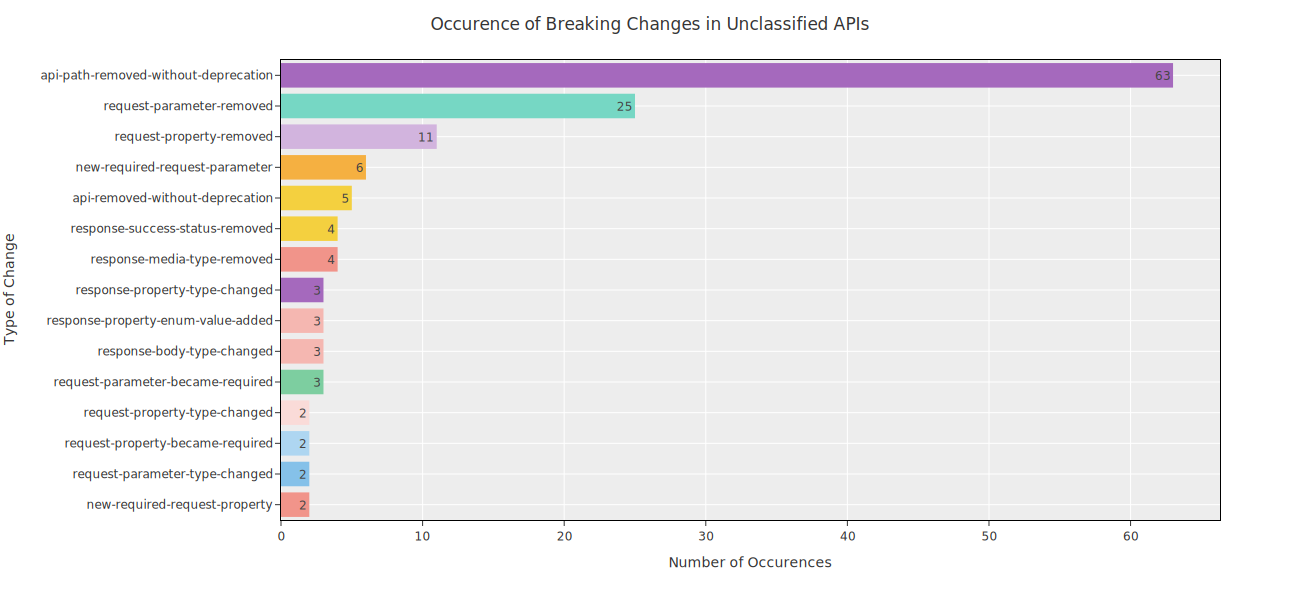

In [ ]:
fig= px.histogram(other_changes, x="Other", y="content",color="content", color_discrete_sequence=['#A569BD', '#F4D03F', '#F5B041', '#F1948A', '#7DCEA0', '#76D7C4', '#85C1E9', '#AED6F1', '#D2B4DE', '#FADBD8', '#F5B7B1', '#F1948A', '#F5B7B1'], text_auto=True)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(categoryorder='total ascending',showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_layout(template='ggplot2',width=1300, height=600, title = 'Occurence of Breaking Changes in Unclassified APIs', xaxis_title='Number of Occurences', yaxis_title='Type of Change', showlegend=False)

fig.show("svg")
